In [2]:
from IPython.display import SVG
import numpy as np
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.classification import DiffusionClassifier, get_accuracy_score
from sknetwork.visualization import svg_graph, svg_bigraph

# Undirected Graph

In [3]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

In [4]:
labels = {i: labels_true[i] for i in [0, 33]}

diffusion = DiffusionClassifier()
labels_pred = diffusion.fit_predict(adjacency, labels)

accuracy = get_accuracy_score(labels_true, labels_pred)
np.round(accuracy, 2)

0.97

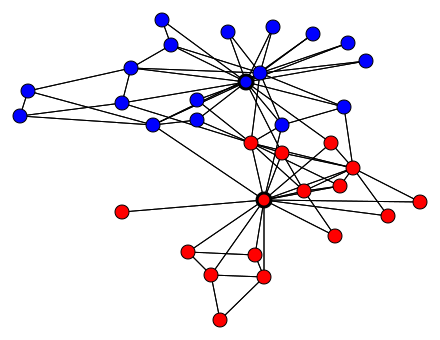

In [5]:
image = svg_graph(adjacency, position, labels=labels_pred, seeds=labels)
SVG(image)

In [6]:
# probability distribution over labels
probs = diffusion.predict_proba()

probs

array([[0.0061429 , 0.9938571 ],
       [0.12913582, 0.87086418],
       [0.43828759, 0.56171241],
       [0.08339471, 0.91660529],
       [0.0080928 , 0.9919072 ],
       [0.00879691, 0.99120309],
       [0.00879691, 0.99120309],
       [0.08194841, 0.91805159],
       [0.69237072, 0.30762928],
       [0.91084856, 0.08915144],
       [0.0080928 , 0.9919072 ],
       [0.0061429 , 0.9938571 ],
       [0.02313087, 0.97686913],
       [0.27884655, 0.72115345],
       [0.97980535, 0.02019465],
       [0.97980535, 0.02019465],
       [0.0098036 , 0.9901964 ],
       [0.02932703, 0.97067297],
       [0.97980535, 0.02019465],
       [0.3329027 , 0.6670973 ],
       [0.97980535, 0.02019465],
       [0.02932703, 0.97067297],
       [0.97980535, 0.02019465],
       [0.96024402, 0.03975598],
       [0.87259101, 0.12740899],
       [0.89263086, 0.10736914],
       [0.98710892, 0.01289108],
       [0.91730386, 0.08269614],
       [0.88166224, 0.11833776],
       [0.97813879, 0.02186121],
       [0.

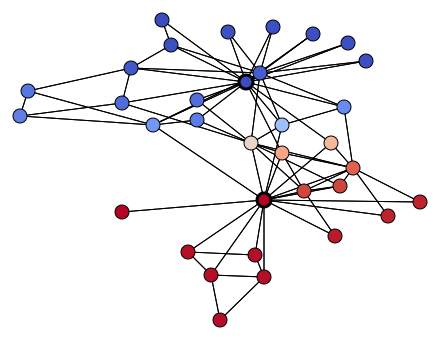

In [7]:
# label 1
scores = probs[:, 1]

image = svg_graph(adjacency, position, scores=scores, seeds=labels)
SVG(image)

# Directed Graph

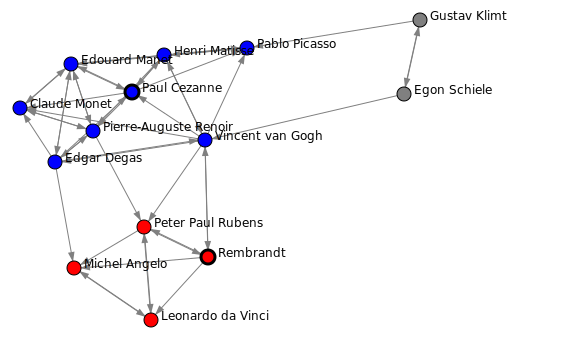

In [8]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

rembrandt = 5
cezanne = 11
labels = {cezanne: 0, rembrandt: 1}

diffusion = DiffusionClassifier()
labels_pred = diffusion.fit_predict(adjacency, labels)

image = svg_graph(adjacency, position, names, labels=labels_pred, seeds=labels)
SVG(image)

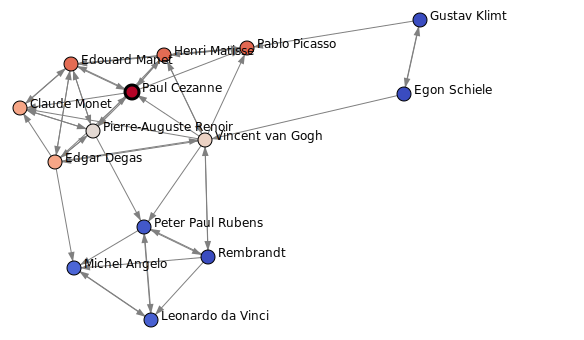

In [9]:
# probability distribution over labels
probs = diffusion.predict_proba()

# label 0
scores = probs[:, 0]

image = svg_graph(adjacency, position, names=names, scores=scores, seeds=[cezanne])
SVG(image)